Neural Networks with
 TensorFlow/Keras

 Description: Build and train a simple feed-forward
 neural network to classify images or structured data.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test data: (10000, 28, 28)
Shape of test labels: (10000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8084 - loss: 0.6350 - val_accuracy: 0.9555 - val_loss: 0.1499
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9539 - loss: 0.1567 - val_accuracy: 0.9637 - val_loss: 0.1137
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9683 - loss: 0.1079 - val_accuracy: 0.9718 - val_loss: 0.0935
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9751 - val_loss: 0.0863
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9810 - loss: 0.0608 - val_accuracy: 0.9737 - val_loss: 0.0877
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9858 - loss: 0.0464 - val_accuracy: 0.9738 - val_loss: 0.0862
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9740 - val_loss: 0.0905
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9886 - loss: 0.0380 - val_accuracy: 0.

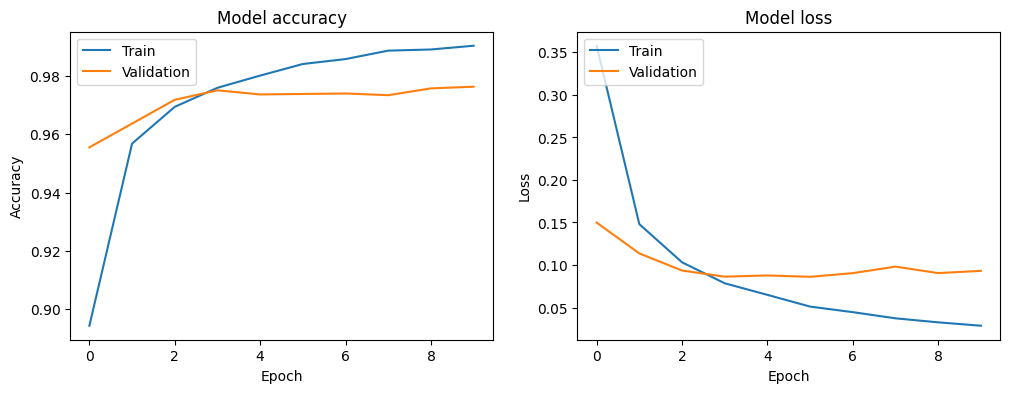

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Load and Preprocess the MNIST Dataset
# The dataset is already split into training and testing sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(f"Shape of training data: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of test data: {x_test.shape}")
print(f"Shape of test labels: {y_test.shape}")


# 2. Design the Neural Network Architecture
model = keras.Sequential([
    # Flattens the 28x28 image into a single 784-element vector
    keras.layers.Flatten(input_shape=(28, 28)),

    # A fully connected (Dense) hidden layer with 128 neurons and a ReLU activation function
    keras.layers.Dense(128, activation='relu'),

    # Another hidden layer to add more complexity
    keras.layers.Dense(64, activation='relu'),

    # A dropout layer to prevent overfitting
    keras.layers.Dropout(0.2),

    # The output layer with 10 neurons (for digits 0-9) and a softmax activation
    # Softmax ensures the output values are probabilities that sum to 1
    keras.layers.Dense(10, activation='softmax')
])

# Display the model's architecture
model.summary()

# 3. Compile the Model
# 'adam' is a popular optimizer
# 'sparse_categorical_crossentropy' is used for integer labels (0, 1, 2...)
# 'accuracy' is the metric we'll use to evaluate the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
# Train the model for 10 epochs
# Use a validation split to see how the model performs on unseen data during training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# 5. Evaluate the Model
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()